In [2]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 7.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.0 MB 8.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 11.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.0 MB 13.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.0 MB 10.9 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.0 MB 13.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 12.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 12.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.9/11.0 MB 13.3 MB/s eta 0:00:01
   ----------------------------- ---------- 8.2/11.0 MB 14.2 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.7 MB 11.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.4/10.7 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.7 MB 14.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.7 MB 15.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.7 MB 17.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.7 MB 17.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.7 MB 15.9 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.7 MB 15.5 MB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
df=pd.read_csv("data/house_prices.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [8]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [9]:
X=np.reshape(df['Area of the house(excluding basement)'].values,(-1,1))
y=np.reshape(df['Price'].values,(-1,1))

In [10]:
X

array([[3370],
       [1910],
       [2910],
       ...,
       [1070],
       [1030],
       [ 900]], shape=(14620, 1))

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
model.coef_

array([[271.18100724]])

In [15]:
model.intercept_

array([50322.63842346])

Text(0, 0.5, 'Price')

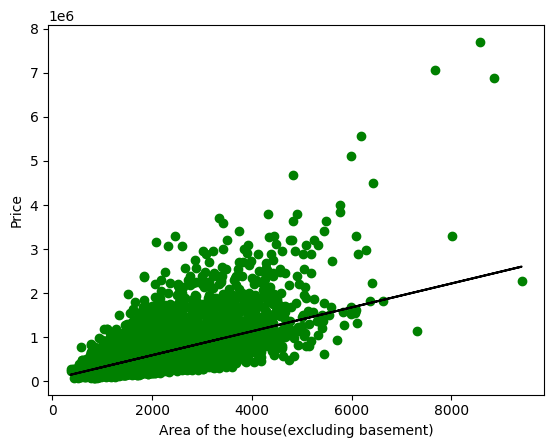

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='green')
plt.plot(X, model.predict(X), color='black')
plt.xlabel('Area of the house(excluding basement)')
plt.ylabel('Price')

In [19]:
model.predict([[2000]])

array([[592684.65289369]])

### Evaluation Parameters

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y, model.predict(X)))
print("R^2 Score:", r2_score(y, model.predict(X)))

Mean Squared Error: 83947027364.32866
R^2 Score: 0.37849616502232564


there is no linear relationship between size and the price


## 1. Mean Squared Error (MSE)
- Measures the average of the squared differences between actual and predicted values.
- Formula: MSE = (1/n) * Σ(actual - predicted)²
- Lower MSE = better fit
- Sensitive to outliers

## 2. R-squared (R²)
- Indicates how well the model explains the variability in the target variable.
- Formula: R² = 1 - (SS_res / SS_tot)
- R² = 1 → perfect prediction
- R² = 0 → no better than mean
- R² < 0 → worse than predicting the mean

### What are SS_res and SS_tot?
- **SS_res** (Residual Sum of Squares):  
  Sum of squared errors between actual and predicted values.  
  Formula: Σ(actual - predicted)²

- **SS_tot** (Total Sum of Squares):  
  Total variance in actual values from their mean.  
  Formula: Σ(actual - mean)²

## Quick Comparison

| Metric   | Best Value | Meaning              |
|----------|------------|----------------------|
| MSE      | 0          | No prediction error  |
| R² Score | 1          | Perfect model fit    |

## Usage
- Use **MSE** to measure prediction error.
- Use **R²** to understand how much variance is explained by the model.
